In [1]:
from Generators.BL import BL
from Samplers.IAF_KernelBased import IAF_KernelBased

In [2]:
dur = 5

dt = 0.05

f_max = 3

N_c = 1

min_diff = 1

In [3]:
bl = BL(dur, dt, f_max, N_c)
t, u = bl.generate()

In [4]:
alpha = 1 
theta = 0.04

gamma = 0.5
Ts = 1/f_max

In [5]:
iaf_kernel_based = IAF_KernelBased(alpha, theta, gamma, Ts)

iaf_kernel_based.setSignal(t, u, dt)

spikes = iaf_kernel_based.encode()

u_rec = iaf_kernel_based.decode()

iaf_kernel_based.summary()

Integrate-and-Fire Sampler - KernelBased
From "APPROXIMATE RECONSTRUCTION OF BANDLIMITED FUNCTIONS FOR THE INTEGRATE AND FIRE SAMPLER"
Hans G. Feichtinger, 2009
Status: DECODED
Parameters:
Firing parameter 'alpha': 1
Threshold 'theta': 0.04


/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/scipy/signal/waveforms.py:658: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif idx == 'mid':


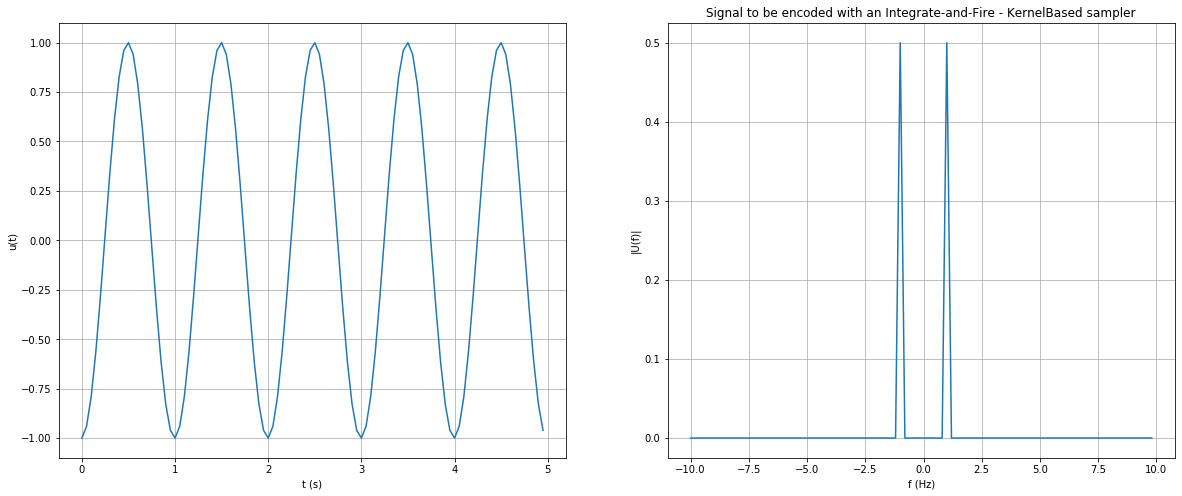

In [6]:
iaf_kernel_based.plotSignal()

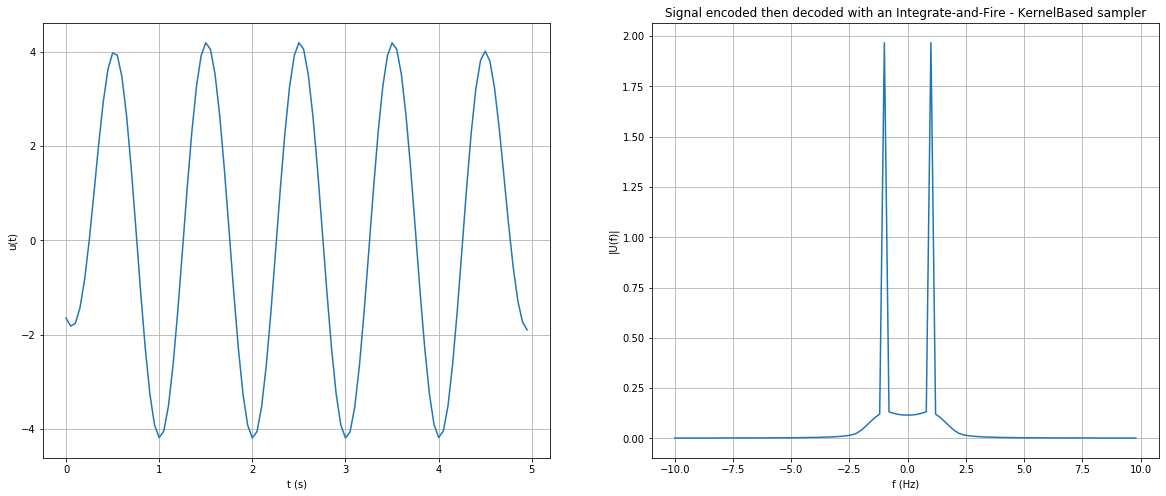

In [7]:
iaf_kernel_based.plotRecoveredSignal()

/home/ghassenk/Bureau/EPFL/Master2/Semester Project - ICNS/plots.py:79: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, enc_output, 'b', label=enc_output_label)


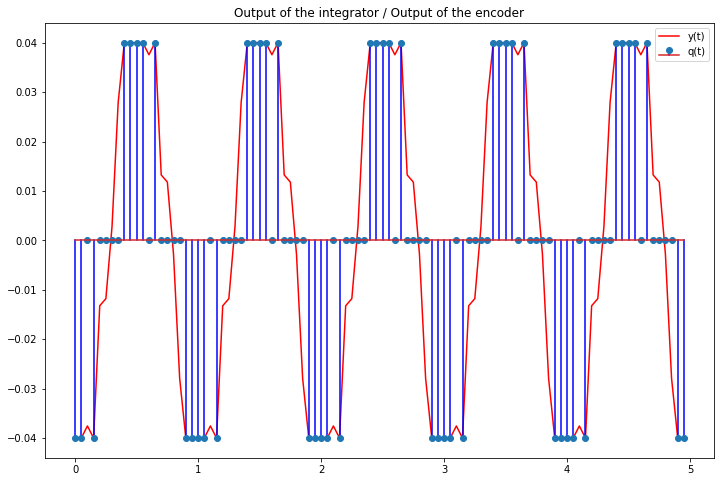

In [8]:
iaf_kernel_based.plotIntegralAndEncoderOutput()

/home/ghassenk/Bureau/EPFL/Master2/Semester Project - ICNS/plots.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(t, u)


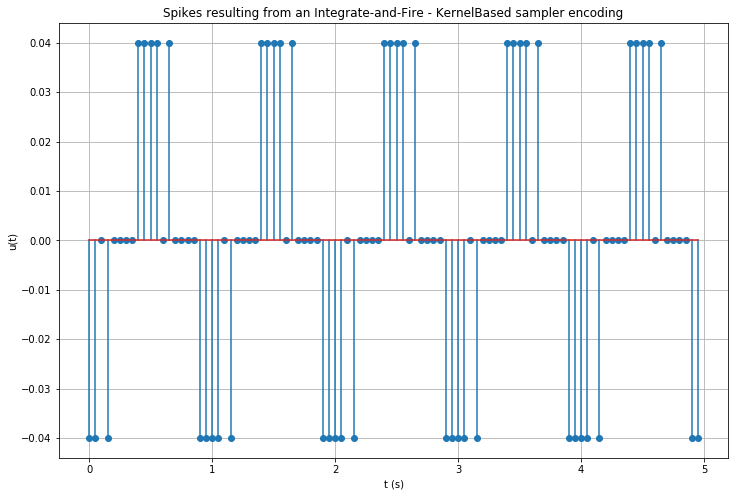

In [9]:
iaf_kernel_based.plotSpikes()

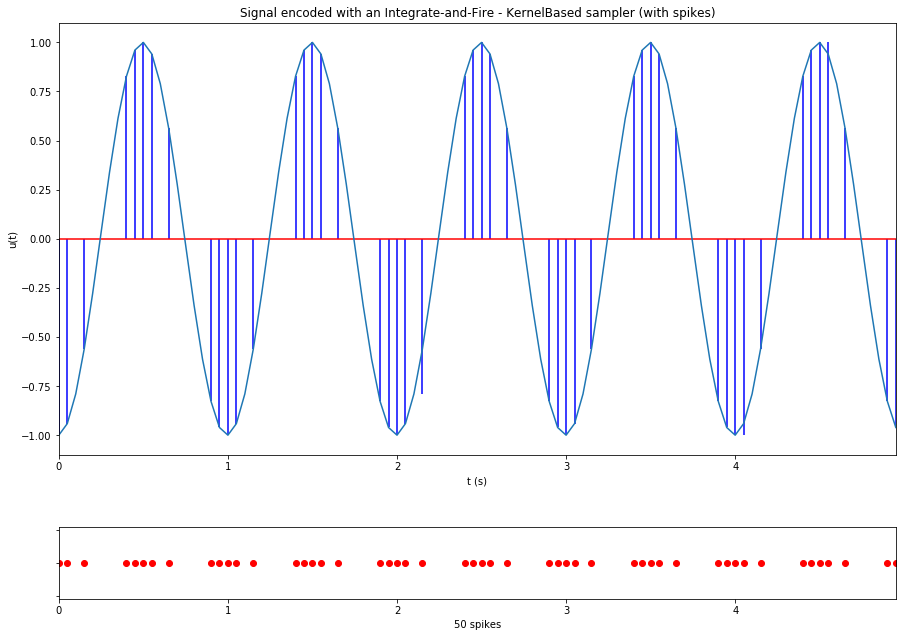

In [10]:
iaf_kernel_based.plotSignalAndSpikes()

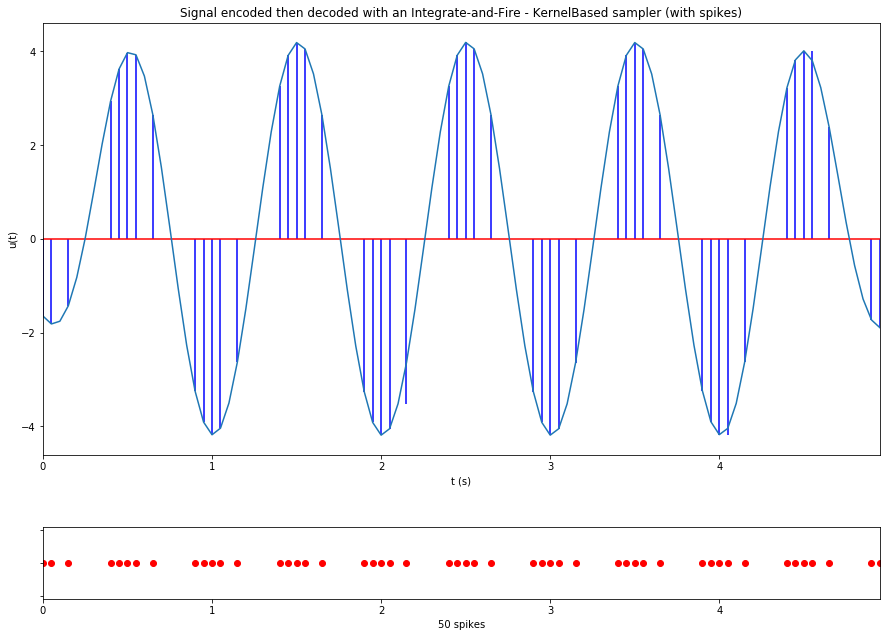

In [11]:
iaf_kernel_based.plotRecoveredSignalAndSpikes()

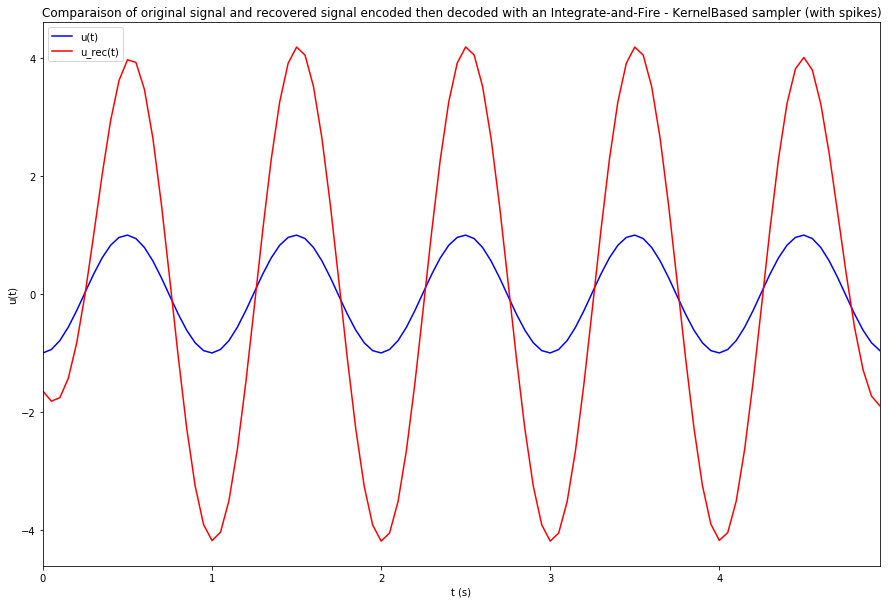

In [12]:
iaf_kernel_based.plotSignalAndRecoveredSignal()

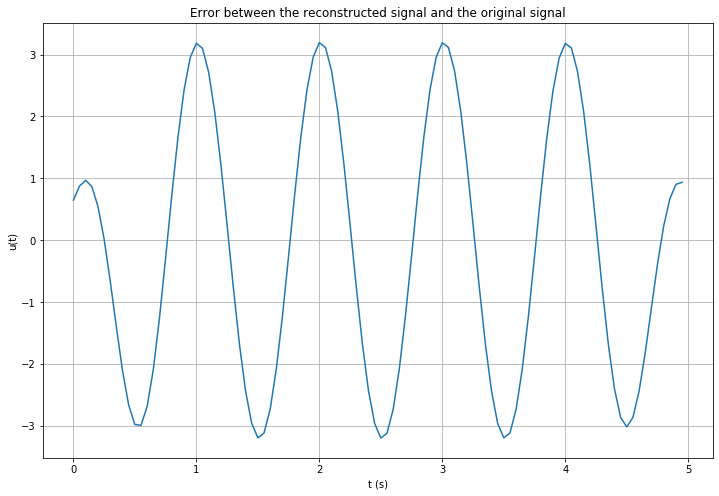

In [13]:
iaf_kernel_based.plotError()

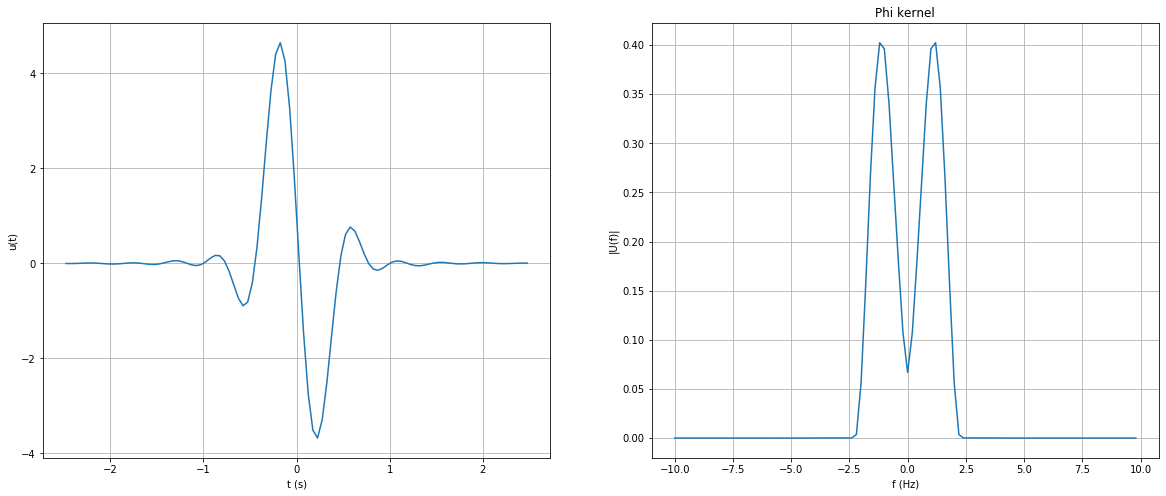

In [14]:
iaf_kernel_based.plotPhiKernel()

In [15]:
print(f'The mean squared error of the signal is : {iaf_kernel_based.computeMeanSquaredError()}')

The mean squared error of the signal is : 453.3634010206417
